<a href="https://colab.research.google.com/github/hydekage/Analisis-Data/blob/main/Studi_Kasus_Interquartile_Range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Studi Kasus Analisis Trafic Website dengan IQR

##Perhatian!
Dataset yang digunakan adalah data sintetis untuk kebutuhan Pembelaran

This case study explores a simulated dataset representing daily website traffic, where outliers can occur due to various factors like marketing campaigns, news mentions, or technical issues. Analyzing and handling these outliers is crucial for accurate traffic forecasting and understanding user behavior.



,Date,Traffic
0,2023-01-01,1099.342831
1,2023-01-02,972.347140
2,2023-01-03,1129.537708
3,2023-01-04,1304.605971
4,2023-01-05,953.169325


,Date,Traffic
count,365,365.000000
mean,2023-07-02 00:00:00,1028.225411
min,2023-01-01 00:00:00,105.009857
25%,2023-04-02 00:00:00,869.334153
50%,2023-07-02 00:00:00,1012.046042
75%,2023-10-01 00:00:00,1130.278250
max,2023-12-31 00:00:00,3618.599713
std,NaN,322.847864


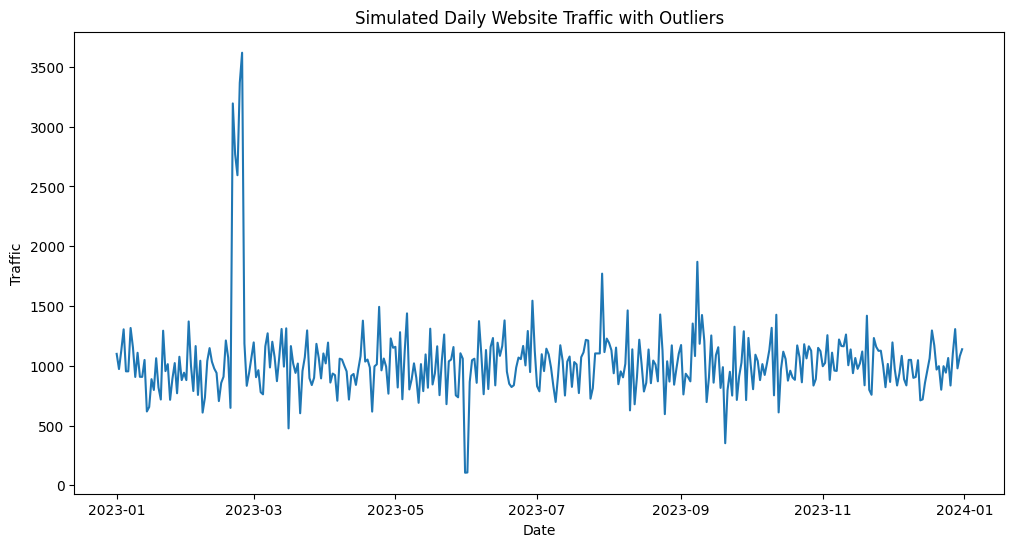

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate simulated daily website traffic data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
traffic = np.random.normal(loc=1000, scale=200, size=365)

# Introduce outliers
# Spike due to a marketing campaign
traffic[50:55] = traffic[50:55] * 3

# Drop in traffic due to a server issue
traffic[150:152] = traffic[150:152] * 0.1

# Another spike due to news mention
traffic[250] = traffic[250] * 2.5

df_traffic = pd.DataFrame({'Date': dates, 'Traffic': traffic})

# Display the first few rows and basic statistics
display(df_traffic.head())
display(df_traffic.describe())

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df_traffic['Date'], df_traffic['Traffic'])
plt.title('Simulated Daily Website Traffic with Outliers')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.show()

### Outlier Detection using IQR

The Interquartile Range (IQR) is a measure of statistical dispersion, calculated as the difference between the 75th and 25th percentiles of the data. Outliers are often defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Identified Outliers:


,Date,Traffic
50,2023-02-20,3194.450382
51,2023-02-21,2768.950632
52,2023-02-22,2593.846800
53,2023-02-23,3367.005773
54,2023-02-24,3618.599713
74,2023-03-16,476.050979
150,2023-05-31,105.009857
151,2023-06-01,106.928964
179,2023-06-29,1544.033833
209,2023-07-29,1770.546298


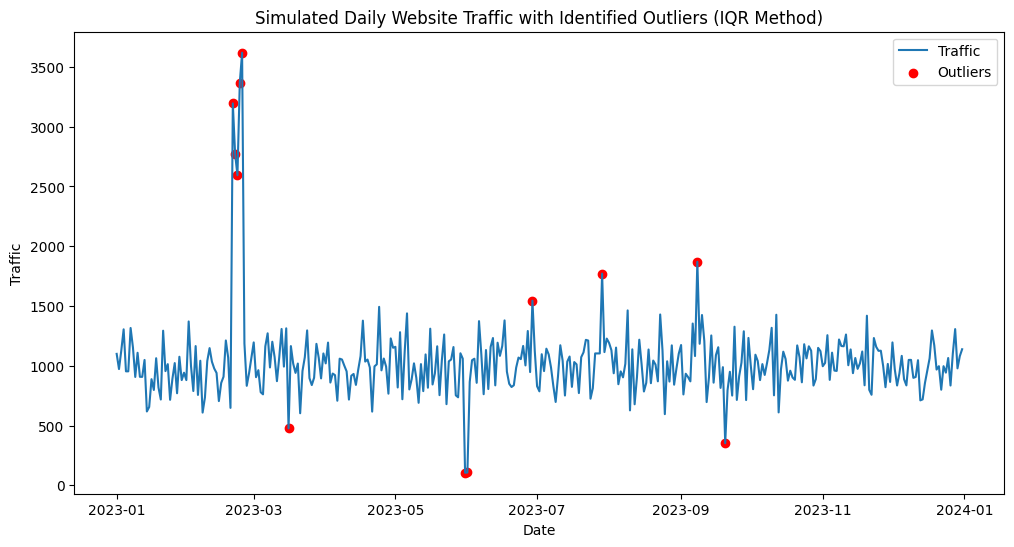

In [2]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_traffic['Traffic'].quantile(0.25)
Q3 = df_traffic['Traffic'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_traffic[(df_traffic['Traffic'] < lower_bound) | (df_traffic['Traffic'] > upper_bound)]

print("Identified Outliers:")
display(outliers)

# Visualize the outliers on the plot
plt.figure(figsize=(12, 6))
plt.plot(df_traffic['Date'], df_traffic['Traffic'], label='Traffic')
plt.scatter(outliers['Date'], outliers['Traffic'], color='red', label='Outliers')
plt.title('Simulated Daily Website Traffic with Identified Outliers (IQR Method)')
plt.xlabel('Date')
plt.ylabel('Traffic')
plt.legend()
plt.show()

### Outlier Visualization using Boxplot

A boxplot is another useful visualization tool for identifying outliers. It displays the distribution of the data based on the five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. Outliers are typically shown as individual points beyond the whiskers.

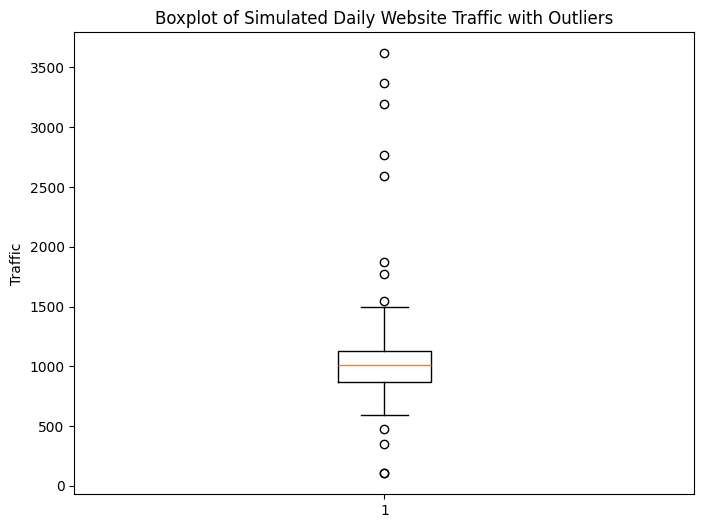

In [3]:
import matplotlib.pyplot as plt

# Visualize the data using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_traffic['Traffic'])
plt.title('Boxplot of Simulated Daily Website Traffic with Outliers')
plt.ylabel('Traffic')
plt.show()